In [123]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pandas_datareader import data

### Definimos fecha de inicio, un plazo de 5 anios
1 de octubre 2017

In [124]:
fechaInicio = "2017-10-01"
hoy = datetime.today().strftime('%Y-%m-%d')

In [125]:
activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "TSLA", "V"]
activos

['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'V']

In [126]:
df = data.DataReader(activos, data_source='yahoo', start=fechaInicio, end=hoy)['Adj Close']
df

Symbols,AAPL,MSFT,AMZN,GOOGL,FB,TSLA,V
Date,,,,,,,
2017-10-02,36.493935,70.107254,47.959499,48.373501,NaN,22.768667,102.081436
2017-10-03,36.652908,69.778389,47.855000,48.604000,NaN,23.209333,102.226654
2017-10-04,36.415638,70.182419,48.272499,48.339001,NaN,23.667334,101.955589
2017-10-05,36.868816,71.385201,49.042500,49.259499,NaN,23.688667,102.855949
2017-10-06,36.847469,71.413368,49.479000,49.681999,NaN,23.792000,103.330345
...,...,...,...,...,...,...,...
2022-10-24,149.449997,247.250000,119.820000,102.519997,129.720001,211.250000,190.710007
2022-10-25,152.339996,250.660004,120.599998,104.480003,137.509995,222.419998,194.380005
2022-10-26,149.350006,231.320007,115.660004,94.930000,129.820007,224.639999,203.330002


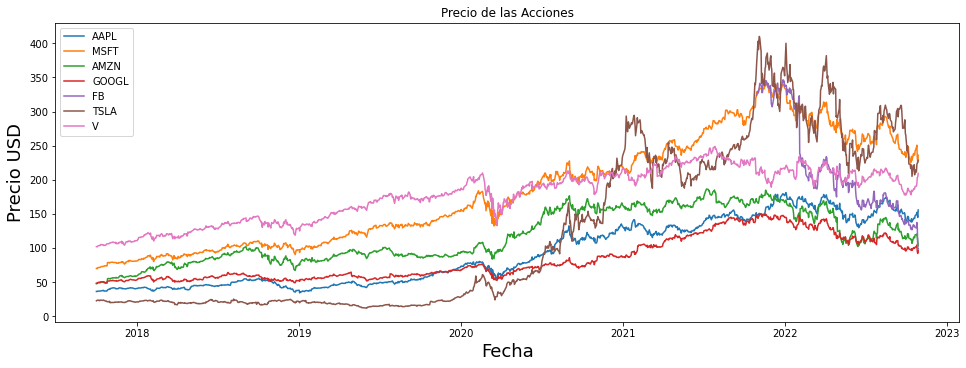

In [127]:
plt.figure(figsize=(16.2, 5.5))
for i in df.columns.values:
    plt.plot(df[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio USD', fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.show()

### Calculamos el rendimiento con el periodo anterior

In [128]:
rendimiento = (df / df.shift(1) -1)
rendimiento

Symbols,AAPL,MSFT,AMZN,GOOGL,FB,TSLA,V
Date,,,,,,,
2017-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-03,0.004356,-0.004691,-0.002179,0.004765,NaN,0.019354,0.001423
2017-10-04,-0.006473,0.005790,0.008724,-0.005452,NaN,0.019733,-0.002652
2017-10-05,0.012445,0.017138,0.015951,0.019043,NaN,0.000901,0.008831
2017-10-06,-0.000579,0.000395,0.008900,0.008577,NaN,0.004362,0.004612
...,...,...,...,...,...,...,...
2022-10-24,0.014803,0.021188,0.004190,0.013745,-0.002231,-0.014876,0.001786
2022-10-25,0.019338,0.013792,0.006510,0.019118,0.060052,0.052876,0.019244
2022-10-26,-0.019627,-0.077156,-0.040962,-0.091405,-0.055923,0.009981,0.046044


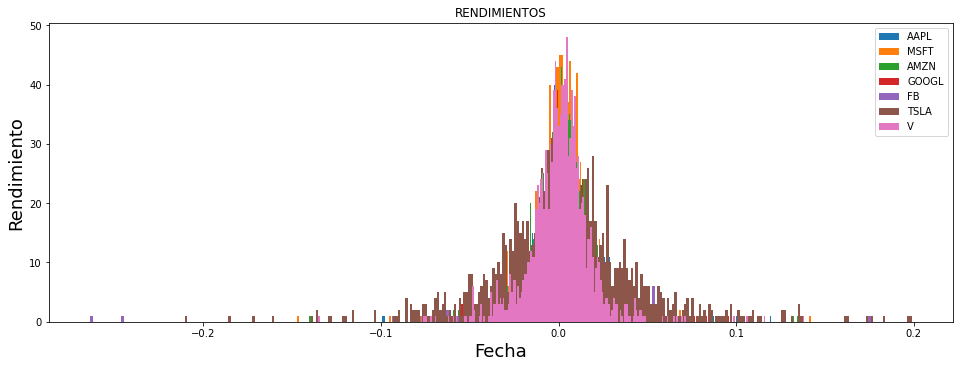

In [129]:
plt.figure(figsize=(16.2, 5.5))
for i in rendimiento.columns.values:
    plt.hist(rendimiento[i], label = i, bins=300)
plt.title('RENDIMIENTOS')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Rendimiento', fontsize=18)
plt.legend(rendimiento.columns.values, loc='upper left')
plt.legend(rendimiento.columns.values)
plt.savefig('Rendimientos.png', dpi=300, bbox_inches='tight')

plt.show()

### Matriz de covarianzas
    - Valor que refleja en qué cuantía dos variables aleatorias varían de forma conjunta respecto a sus medias.

In [130]:
mCovarianzas = rendimiento.cov()
# Escala de colores
cm = sns.light_palette("green", as_cmap=True)
mCovarianzas.style.background_gradient(cmap=cm)

Symbols,AAPL,MSFT,AMZN,GOOGL,FB,TSLA,V
Symbols,,,,,,,
AAPL,0.000424,0.000300,0.000290,0.000273,0.000473,0.000383,0.000234
MSFT,0.000300,0.000366,0.000299,0.000294,0.000490,0.000353,0.000243
AMZN,0.000290,0.000299,0.000488,0.000285,0.000697,0.000374,0.000199
GOOGL,0.000273,0.000294,0.000285,0.000369,0.000587,0.000315,0.000226
FB,0.000473,0.000490,0.000697,0.000587,0.001493,0.000653,0.000325
TSLA,0.000383,0.000353,0.000374,0.000315,0.000653,0.001628,0.000271
V,0.000234,0.000243,0.000199,0.000226,0.000325,0.000271,0.000332


In [131]:
nrosActivos = len(rendimiento.columns)
nrosActivos

7

##### Definimos 3 arrays. 
    - PesosPortafolio = pesos randoms con cantidad de elementos igual al numero de activos.
    - rportafolio = Rendimiento del portafolio
    - sdPortafolio = desvio standard, o riesgo del portafolio

In [132]:
pesosPortafolio = []
rportafolio = []
sdPortafolio = []

##### Generamos una matriz de size 7, y le asignamos valor random. Luego dividimos array por su valor de suma para que toda la suma del array sea = 1
    - El range 5000 significa la cantidad de corridas que vamos a hacer en la simulacion

In [133]:
for x in range(5000):
    pesos = np.random.random(nrosActivos) # Matriz de 1x7
    pesos /= np.sum(pesos) 
    pesosPortafolio.append(pesos) 
    # Retorno la "sumaProducto" o el producto de la matriz 
    # con los porcentajes de inversion X el rendimiento de cada activo
    rportafolio.append(np.dot(rendimiento.mean(), pesos)) # rendimiento.mean() = matriz de 7X1
    # np.dot(mCovarianzas, pesos)  retorna matriz 1X7 de multiplicar los
    # pesos(porcentaje a invertir) y la matriz de covarianzas
    # A esa matriz de 1X7 de varianzas, la vuelvo a multiplicar por pesos.T
    # eso nos devuelve un solo resultado, la varianza de la inversion y
    # posteriormente el STD
    sdPortafolio.append(np.sqrt(
        np.dot(pesos.T, np.dot(mCovarianzas, pesos))
    ))


In [160]:
diccionario = {'Rendimiento': rportafolio, "Riesgo": sdPortafolio}

In [166]:
for i, accion in enumerate(rendimiento.columns.tolist()):
    


0 AAPL
1 MSFT
2 AMZN
3 GOOGL
4 FB
5 TSLA
6 V


In [172]:
[w[0] for w in pesosPortafolio]

[0.16342095438918958,
 0.23394710217163062,
 0.0701395425467934,
 0.1180464383265108,
 0.260696866652737,
 0.10767176598882539,
 0.07540893401700542,
 0.14359666931306672,
 0.1711765306439566,
 0.2191555173853201,
 0.14509286987466738,
 0.1814262462731064,
 0.2900248820155201,
 0.22441396133017938,
 0.041814069918479815,
 0.018006401590395956,
 0.006276520544375468,
 0.016137442825743684,
 0.09138963899224926,
 0.1863766839555571,
 0.06984780128959332,
 0.24453601615537723,
 0.14041987095161176,
 0.0942893208437368,
 0.29591627856251623,
 0.28443936411899834,
 0.16359960146306704,
 0.15928577880883954,
 0.025924413752327555,
 0.039126393437366014,
 0.027115440035474205,
 0.14283512411232083,
 0.1663665275697382,
 0.0012136707170340366,
 0.18258790418893353,
 0.1283199988699053,
 0.19096341442663392,
 0.09882029734513102,
 0.2013223809113034,
 0.0359631594013179,
 0.09194383381089931,
 0.11737578040758433,
 0.005316576852550247,
 0.11030358223715479,
 0.21025928286969034,
 0.13261896702

0.23394710217163062